# **MODELADO PARA LA PRECIPITACIÓN EN EL ZÓCALO DE PUEBLA**



Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('MXN00021035.csv')

In [4]:
pre=data.iloc[:,6]  # Keep the 7th column (the one with the date)
date=data.iloc[:,5] # Keep the 6th column (the one with the temperature)
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # From 195210 to 1952/10 
date = pd.to_datetime(date, format='%Y/%m')# Convert the date column to datetime

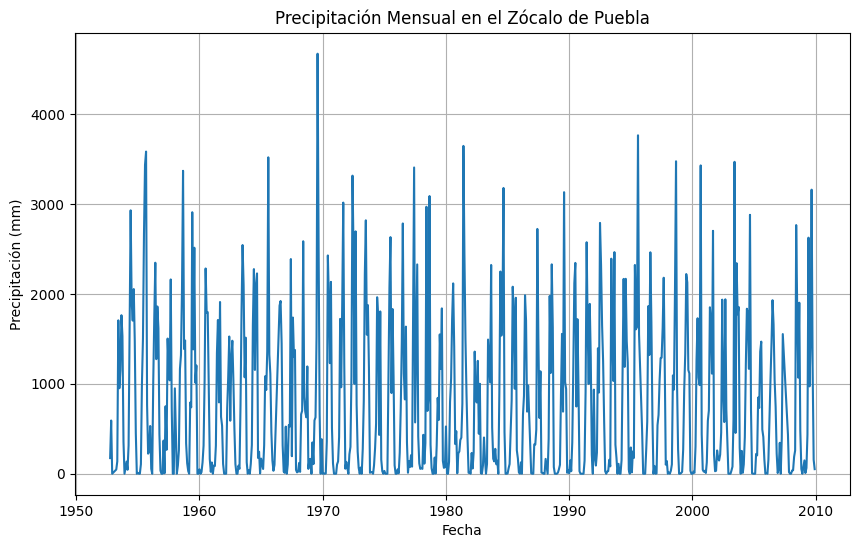

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(date, pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

# **TRANSFORMACIÓN**

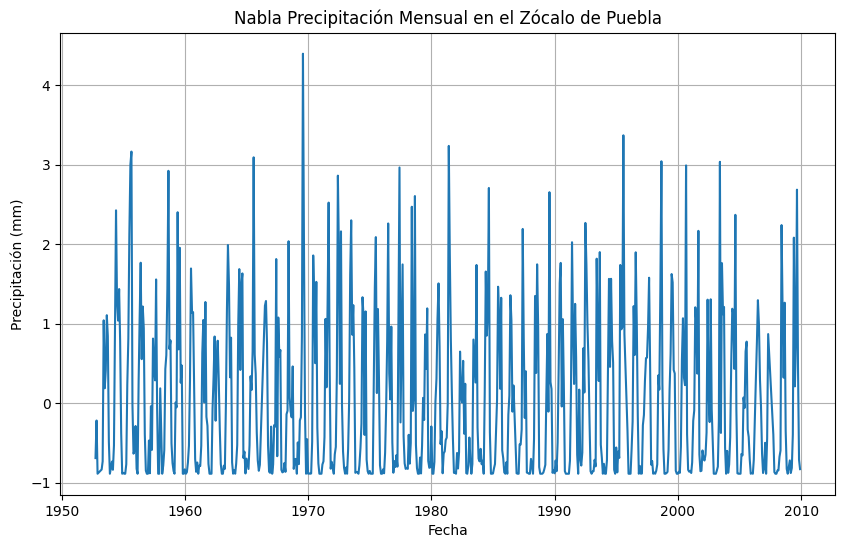

In [ ]:
# estandarizar la serie
zpre = (pre - pre.mean()) / pre.std()

# graficar la serie estandarizada
plt.figure(figsize=(10, 6))
plt.plot(date, zpre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Estandarizada Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

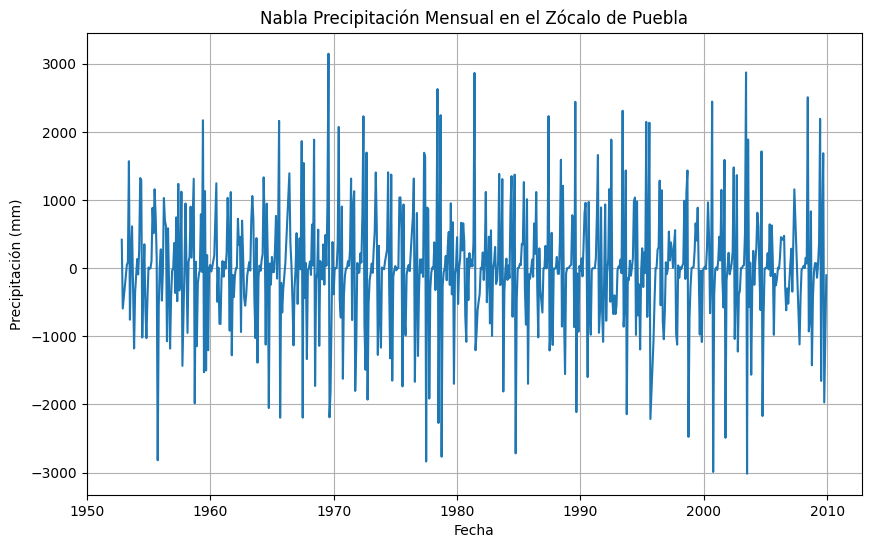

In [ ]:
# aplicar la primera diferencia
dpre = pre.diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(date[1:], dpre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Nabla Precipitación Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

# **ESTACIONARIEDAD**

In [7]:
from statsmodels.tsa.stattools import adfuller

In [58]:
adfuller(pre)

(np.float64(-6.217559258126873),
 np.float64(5.319944160548207e-08),
 11,
 660,
 {'1%': np.float64(-3.440296841949105),
  '5%': np.float64(-2.8659291016222834),
  '10%': np.float64(-2.569107357667585)},
 np.float64(10188.524149780042))

In [59]:
estacionariedad = adfuller(pre)

if estacionariedad[1] < 0.05:
    print("La serie es estacionaria", estacionariedad[1])

La serie es estacionaria 5.319944160548207e-08


In [60]:
adfuller(dpre)

(np.float64(-14.369902378062521),
 np.float64(9.532927523434906e-27),
 13,
 657,
 {'1%': np.float64(-3.440342440623255),
  '5%': np.float64(-2.8659491890487026),
  '10%': np.float64(-2.569118060113657)},
 np.float64(10207.80839358494))

## **AUTOCORRELACIONES**

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt

### **Autocorrelaciones Simples**

In [52]:
autocorr_values = acf(pre, nlags=24)    # get the autocorrelations
autocorr_values = autocorr_values[1:]   # drop the first value (lag 0)

print(autocorr_values)

[ 0.50839258  0.23418155  0.01313411 -0.30708039 -0.52560174 -0.57512638
 -0.45457715 -0.24676928  0.05574702  0.28668487  0.51873702  0.62104148
  0.4223674   0.18726716 -0.05027177 -0.31533739 -0.51101384 -0.52356076
 -0.41372522 -0.19536916  0.07490439  0.29360553  0.49171041  0.55390038]


In [61]:
acf(pre, nlags=24)[1:] 

array([ 0.50839258,  0.23418155,  0.01313411, -0.30708039, -0.52560174,
       -0.57512638, -0.45457715, -0.24676928,  0.05574702,  0.28668487,
        0.51873702,  0.62104148,  0.4223674 ,  0.18726716, -0.05027177,
       -0.31533739, -0.51101384, -0.52356076, -0.41372522, -0.19536916,
        0.07490439,  0.29360553,  0.49171041,  0.55390038])

In [53]:
def significancia(N, rhos):
    return 2 * np.sqrt(1 / (N) * (1 + 2 * sum(rho**2 for rho in rhos)))

In [54]:
def FAC(N: int, rhos: list, print_rhos: bool = False) -> list:
    """
    Nos da la lista de los rhos significativos
    """
    significativos = []
    rho_list = [0] * len(rhos)
    
    updated_rhos = list(rho_list)  # Copy to retain original values when updating
    for i, r in enumerate(rhos):  # for index, rho in enumerate(r_list):
        threshold_value = significancia(N, updated_rhos)    # se actualiza el valor con los rhos significativos
        if abs(r) > threshold_value:
            if print_rhos: 
                print(f"rho {i+1} es significativo")
                print(f"{abs(r)} > {threshold_value}\n")

            updated_rhos[i] = r
            significativos.append((r, i+1))
        else:
            if print_rhos: 
                print(f"rho {i+1} no es significativo")
                print(f"{abs(r)} < {threshold_value}\n")

    print("Valores de autocorrelacion significativos:")
    for val, i in significativos:
        print(f"r{i}: {val}")

    return updated_rhos, significativos

In [55]:
val_autocorr_sig, autocorr_sig = FAC(len(pre), autocorr_values) # Valores de autocorrelacion significativos, Autocorrelaciones significativas

Valores de autocorrelacion significativos:
r1: 0.5083925816973087
r2: 0.23418154549209602
r4: -0.30708039075409777
r5: -0.525601739269851
r6: -0.5751263827263251
r7: -0.4545771512790851
r8: -0.2467692768389855
r10: 0.28668487207593624
r11: 0.518737019797207
r12: 0.62104147830531
r13: 0.4223673959805745
r14: 0.18726715812704875
r16: -0.3153373882900101
r17: -0.5110138375479142
r18: -0.523560757866975
r19: -0.4137252180674527
r22: 0.29360552614549634
r23: 0.49171040803243543
r24: 0.5539003811525876


### **Autocorrelaciones Simples**

In [15]:
pacf_values = pacf(pre, nlags=24)
pacf_values = pacf_values[1:]       # drop the first value (lag 0)
print(pacf_values)

[ 0.50915025 -0.03287594 -0.12647798 -0.35612797 -0.33894795 -0.27403763
 -0.13857567 -0.08223542  0.05576356  0.01318253  0.19534353  0.25851008
  0.02594096 -0.00088725  0.01740651 -0.00537288 -0.06427178 -0.05420949
 -0.07395753 -0.03629151 -0.02303549 -0.04347716  0.04677814  0.11135938]


In [16]:
def intervalo(N):
    "Esta es de las autocorrelaciones parciales"
    return 2*np.sqrt(1/ N)

In [17]:
def FACP(N: int, rho_list: list, print_rhos: bool = False) -> list:
    """
    Esta función nos da la lista de los rhos significativos
    """
    
    fueradelintervalo = intervalo(N)
    significativos = []

    for i, r in enumerate(rho_list):
        
        if abs(r) > fueradelintervalo:
            if print_rhos: 
                print(f"rho {i+1} es significativo")
                print(f"{abs(r)} > {fueradelintervalo}\n")
            significativos.append((r, i+1))
        else:
            if print_rhos: 
                print(f"rho {i+1} no es significativo")
                print(f"{abs(r)} < {fueradelintervalo}\n")
                pass

    print(f"Valores de autocorrelacion parcial significativos:")
    for r, i in significativos:
        print(f"rho {i}: {r}")

    return significativos

In [ ]:
facp_sig = FACP(len(pre), pacf_values)

Valores de autocorrelacion parcial significativos:
rho 1: 0.5091502457534897
rho 3: -0.12647798109479702
rho 4: -0.3561279660010308
rho 5: -0.3389479485953009
rho 6: -0.2740376325288502
rho 7: -0.13857567141649174
rho 8: -0.0822354191788456
rho 11: 0.19534353456529419
rho 12: 0.2585100818536459
rho 24: 0.11135938181397906


## **plot**

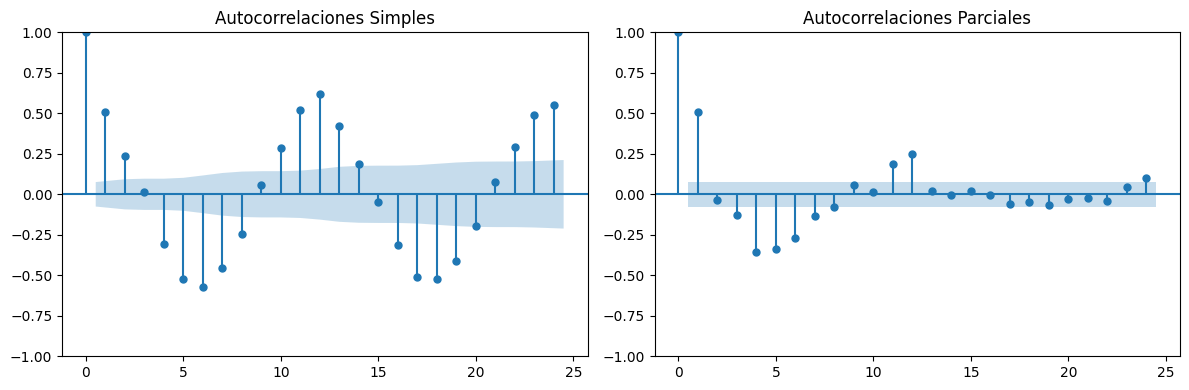

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(pre, lags=24, ax=axs[0])
# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(pre, lags=24, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')

plt.tight_layout()
plt.show()


In [67]:
fac = FAC(len(pre), acf(pre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: 0.5083925816973087
r2: 0.23418154549209602
r4: -0.30708039075409777
r5: -0.525601739269851
r6: -0.5751263827263251
r7: -0.4545771512790851
r8: -0.2467692768389855
r10: 0.28668487207593624
r11: 0.518737019797207
r12: 0.62104147830531
r13: 0.4223673959805745
r14: 0.18726715812704875
r16: -0.3153373882900101
r17: -0.5110138375479142
r18: -0.523560757866975
r19: -0.4137252180674527
r22: 0.29360552614549634
r23: 0.49171040803243543
r24: 0.5539003811525876


In [ ]:
facp = FACP(len(pre), pacf(pre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.5091502457534897
rho 3: -0.12647798109479702
rho 4: -0.3561279660010308
rho 5: -0.3389479485953009
rho 6: -0.2740376325288502
rho 7: -0.13857567141649174
rho 8: -0.0822354191788456
rho 11: 0.19534353456529419
rho 12: 0.2585100818536459
rho 24: 0.11135938181397906


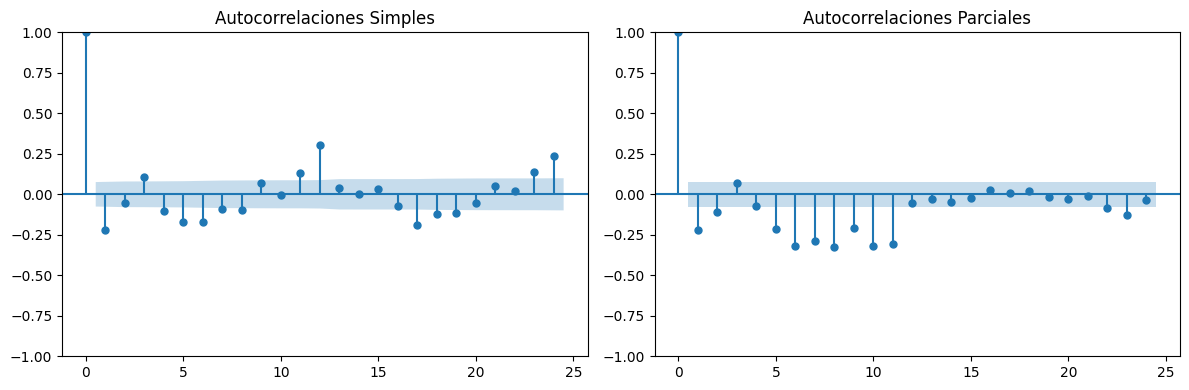

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(dpre, lags=24, ax=axs[0])
# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(dpre, lags=24, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')

plt.tight_layout()
plt.show()


In [70]:
fac = FAC(len(dpre), acf(dpre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: -0.2208552382670342
r3: 0.10390830525106899
r4: -0.1059125095712042
r5: -0.17103827520973158
r6: -0.1718202191019502
r7: -0.09179592411826668
r8: -0.09629819587421846
r11: 0.13167076342070386
r12: 0.30671463810829047
r17: -0.1866969636398212
r18: -0.12361634021919927
r19: -0.1137327163527698
r23: 0.13844098837093044
r24: 0.2342564653224264


In [71]:
facp = FACP(len(dpre), pacf(dpre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: -0.2211848729510148
rho 2: -0.10774677077439372
rho 5: -0.21590129461409885
rho 6: -0.31940094915194445
rho 7: -0.2955195914988785
rho 8: -0.3311470047776021
rho 9: -0.21864855964375957
rho 10: -0.33370702935859453
rho 11: -0.34113912250088857
rho 12: -0.09392430761753182
rho 14: -0.08270696913668539
rho 22: -0.10215395355867311
rho 23: -0.15928203014308878


## **MODELADO**

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
modelo=SARIMAX(pre,
               order=(1,0,1),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                1927   No. Observations:                  672
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood               -5346.959
Date:                             Tue, 22 Apr 2025   AIC                          10701.917
Time:                                     15:48:25   BIC                          10719.958
Sample:                                          0   HQIC                         10708.904
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   7606.435      0.000       1.000       1.000
ma.L1         -0.9990      0.021    -47.589      0.000      -1.040      -0.958
ar.S.L12       0.6324      0.024     25.945      0.000       0.585       0.680
sigma2      4.718e+05      2e-08   2.36e+13      0.000    4.72e+05    4.72e+05
===================================================================================
Ljung-Box (L1) (Q):                  23.85   Jarque-Bera (JB):               449.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             1.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.9e+27. Standard errors may be unstable.
"""

In [97]:
modelo=SARIMAX(dpre,
               order=(1,0,1),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               1927   No. Observations:                  671
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -5279.792
Date:                            Tue, 22 Apr 2025   AIC                          10569.585
Time:                                    15:50:23   BIC                          10592.128
Sample:                                         0   HQIC                         10578.316
                                            - 671                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1887      0.031      6.081      0.000       0.128       0.250
ma.L1         -1.0000      0.036    -27.702      0.000      -1.071      -0.929
ar.S.L12       0.9246      0.018     52.508      0.000       0.890       0.959
ma.S.L12      -0.6110      0.034    -17.781      0.000      -0.678      -0.544
sigma2      3.934e+05   9.17e-08   4.29e+12      0.000    3.93e+05    3.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               332.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.97
Prob(H) (two-sided):                  0.31   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+27. Standard errors may be unstable.
"""

In [113]:
modelo=SARIMAX(zpre,
               order=(1,0,0),
               seasonal_order=(4,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               1927   No. Observations:                  672
Model:             SARIMAX(1, 0, 0)x(4, 0, 0, 12)   Log Likelihood                -726.886
Date:                            Tue, 22 Apr 2025   AIC                           1465.772
Time:                                    15:55:53   BIC                           1492.833
Sample:                                         0   HQIC                          1476.252
                                            - 672                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1769      0.031      5.728      0.000       0.116       0.237
ar.S.L12       0.3271      0.027     12.028      0.000       0.274       0.380
ar.S.L24       0.1687      0.032      5.263      0.000       0.106       0.232
ar.S.L36       0.2019      0.033      6.149      0.000       0.138       0.266
ar.S.L48       0.0783      0.035      2.241      0.025       0.010       0.147
sigma2         0.5028      0.018     27.726      0.000       0.467       0.538
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               339.29
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.99
Prob(H) (two-sided):                  0.29   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

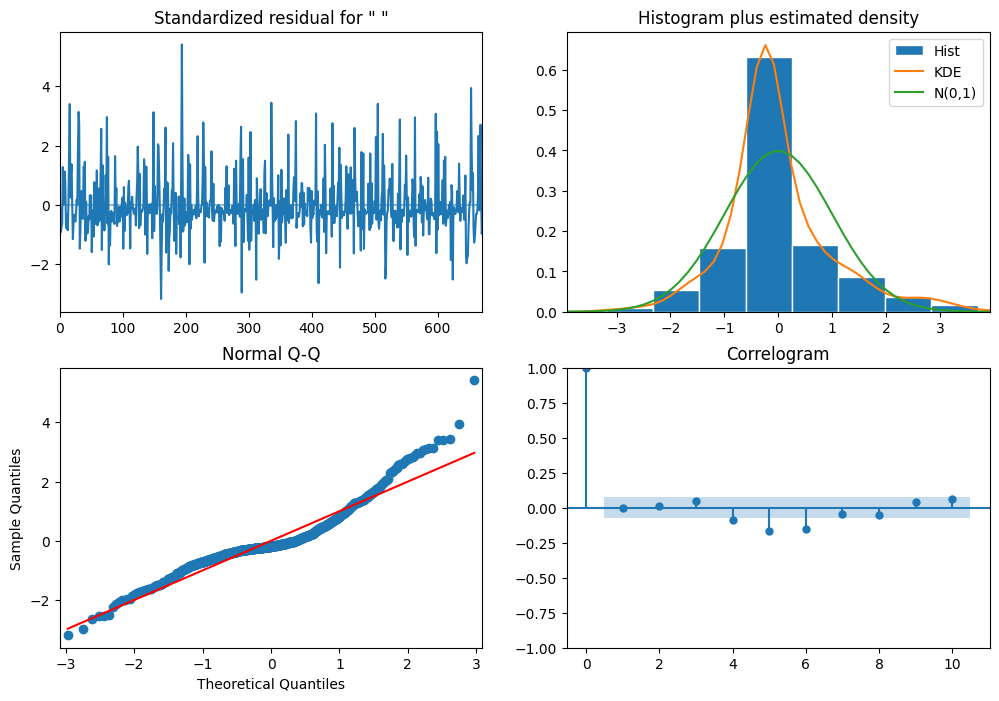

In [114]:
diagnostic = modelo.plot_diagnostics(figsize=(12, 8))
plt.show()

<Axes: ylabel='Density'>

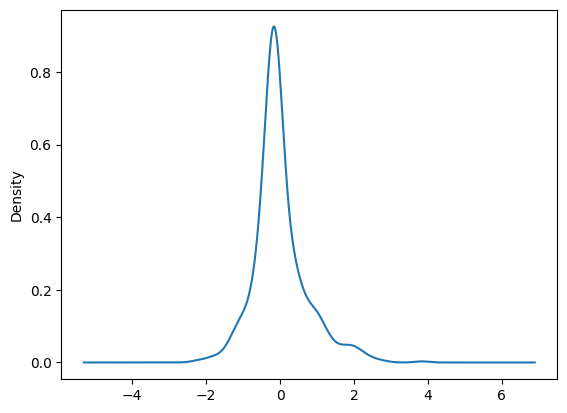

In [115]:
modelo.resid.plot(kind='kde')

<Axes: >

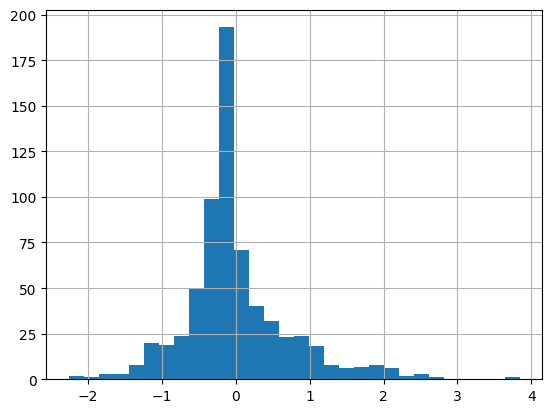

In [ ]:
modelo.resid.hist(bins=30)


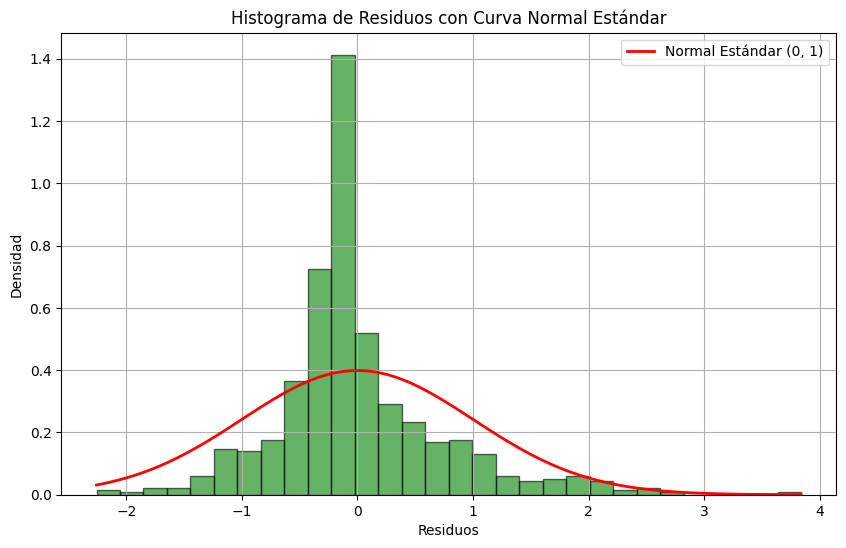

In [117]:
# Importar la función para la distribución normal
from scipy.stats import norm
import numpy as np

# Graficar el histograma de los residuos
plt.figure(figsize=(10, 6))
modelo.resid.hist(bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Generar valores para la curva normal estándar
x = np.linspace(modelo.resid.min(), modelo.resid.max(), 100)
normal_pdf = norm.pdf(x, loc=0, scale=1)  # Media 0, desviación estándar 1

# Graficar la curva normal estándar
plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal Estándar (0, 1)')

# Etiquetas y leyenda
plt.title("Histograma de Residuos con Curva Normal Estándar")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **una libreria que busca el mejor ARIMA**

In [ ]:
import pmdarima as pm

# Find the best SARIMA model
auto_sarima_model = pm.auto_arima(pre, 
                                  seasonal=True, 
                                  m=12,  # Monthly data, so seasonality is 12
                                  stepwise=True, 
                                  suppress_warnings=True, 
                                  trace=True)

# Display the summary of the best model
auto_sarima_model.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## **VERIFICACION DE SUPUESTOS**

## **Principio de Parsimonia**

In [ ]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 1927   No. Observations:                  672
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -5295.998
Date:                              Tue, 22 Apr 2025   AIC                          10599.996
Time:                                      14:39:05   BIC                          10618.037
Sample:                                           0   HQIC                         10606.983
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1954      0.031      6.256      0.000       0.134       0.257
ar.S.L12       0.9661      0.009    110.797      0.000       0.949       0.983
ma.S.L12      -0.6408      0.029    -21.948      0.000      -0.698      -0.584
sigma2      4.006e+05   1.48e+04     27.137      0.000    3.72e+05    4.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               269.09
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.72
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("Verificacion de los residuos")

# get the Prob(JB) value using the Jarque-Bera test
jb_test = resultado.test_normality(method='jarquebera')
jb_test

# get the Ljung-Box test results



Verificacion de los residuos


NameError: name 'resultado' is not defined

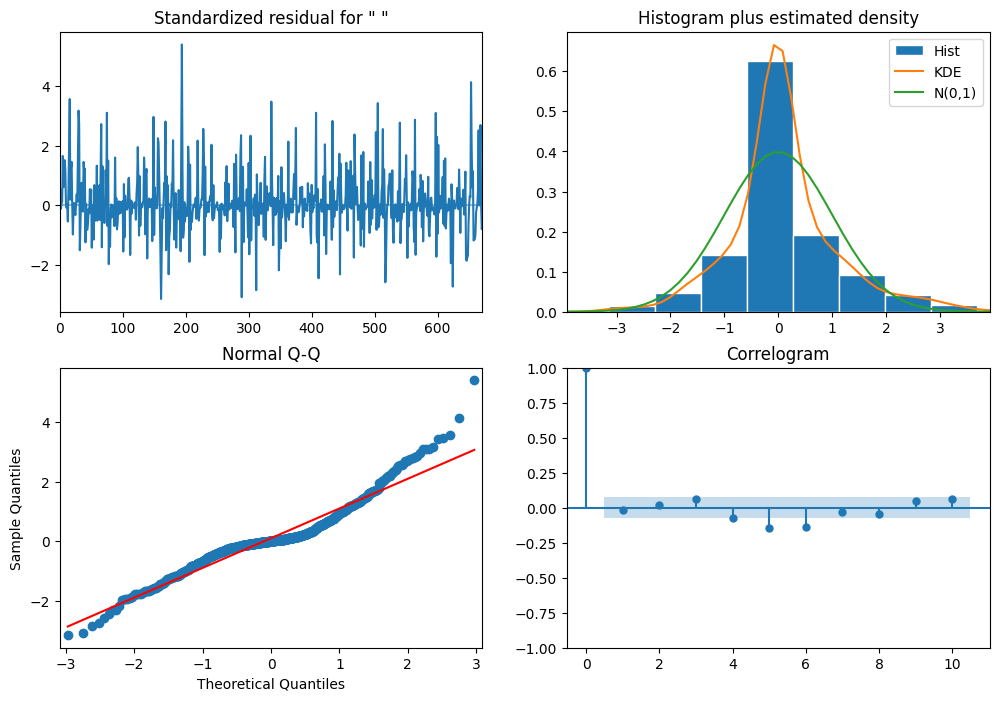

In [ ]:
diagnostic = resultado.plot_diagnostics(figsize=(12, 8))
plt.show()

## **Analisis de Residuos**

In [ ]:
residuos = resultado.resid.dropna()

### **Media Cero**

In [ ]:
from scipy.stats import t as t_dist

In [ ]:
from scipy.stats import ttest_1samp

# H0: The mean of the residuals is equal to 0
# H1: The mean of the residuals is not equal to 0

mediacero = ttest_1samp(residuos, 0)

print(mediacero)
print(f'p-value: {mediacero.pvalue}')
if mediacero.pvalue < 0.05:
    print("La media de los residuos es diferente de cero")
else:  
    print("La media de los residuos es igual a cero")

print(f"\nt-statistic: {mediacero.statistic}")
print(f"p-value: {mediacero.pvalue}")
print(f"t-distribution: {t_dist(df=len(residuos)-1).pdf(mediacero.statistic)}")

TtestResult(statistic=np.float64(2.883298891576977), pvalue=np.float64(0.004061336578803261), df=np.int64(671))
p-value: 0.004061336578803261
La media de los residuos es diferente de cero

t-statistic: 2.883298891576977
p-value: 0.004061336578803261
t-distribution: 0.00636694900689484


In [ ]:
from scipy.stats import wilcoxon

# H0: The median of the residuals is equal to 0
# H1: The median of the residuals is not equal to 0
wilcoxon(residuos)

WilcoxonResult(statistic=np.float64(106129.0), pvalue=np.float64(0.16835069054413332))

El p-valor es muy pequeño, entonces la mediana podría ser diferente de cero :(

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

# H0: The median of the residuals is equal to 0
# H1: The median of the residuals is not equal to 0
sign_test(residuos)

(np.float64(3.0), np.float64(0.8470716605780383))

### **Distribucion Normal**

In [ ]:
from scipy.stats import jarque_bera

normal = jarque_bera(residuos)

print(f"Jarque-Bera statistic: {normal.statistic}")
print(f"p-value: {normal.pvalue}")
if normal.pvalue < 0.05:
    print("Los residuos no son normales")
else:
    print("Los residuos son normales")

Jarque-Bera statistic: 265.0340916440634
p-value: 2.809171420244167e-58
Los residuos no son normales


In [ ]:
from statsmodels.stats.diagnostic import lilliefors
# Estadistico, p-valor
lilliefors(residuos)

(0.09739134988068032, 0.0009999999999998899)

In [ ]:
from scipy.stats import kstest
# Estadistico, p-valor
kstest(residuos, 'norm')

KstestResult(statistic=0.47835200408367273, pvalue=0.0, statistic_location=0.03477562902544919, statistic_sign=1)

In [ ]:
from scipy.stats import normaltest

normaltest(residuos)

NormaltestResult(statistic=6712.437462125869, pvalue=0.0)

In [ ]:
from scipy.stats import anderson

anderson(residuos)

AndersonResult(statistic=592.7394435289825, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.2659254022142346e-06, scale=0.011949027349192001)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### **Varianza Constante**

In [ ]:
from statsmodels.tools.tools import add_constant

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
# H0: Homocedasticidad (varianza constante)
# H1: Heterocedasticidad (varianza no constante)

# Add a constant to the exogenous variables
exog = add_constant(returns)

# Perform the test
stat, p_value, _, _ = het_breuschpagan(residuos, exog)
print(f'Statistic: {stat}, p-value: {p_value}') # p-value > 0.05, homocedasticidad (variancia constante)

Statistic: 295.1704213802668, p-value: 3.715369009463656e-66


### **Independencia**

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuos, lags=10)

,lb_stat,lb_pvalue
1,0.034522,0.852602
2,0.055283,0.972737
3,0.088842,0.993142
4,0.110325,0.998533
5,0.114579,0.999773
6,0.114734,0.999970
7,0.118451,0.999996
8,0.120753,0.999999
9,0.123433,1.000000
10,7.427250,0.684587


como todos los p-valores son mayores a 0.05, no hay evidencia de correlacion significativa entre los lags

### **Modelo admisible**

es Estacionario e einvertible

# **PREDICCIÓN DEL SIGUIENTE DÍA**